# Быстрый старт в анализ данных

**с помощью `Pandas` и `Scikit-learn`,**
**а также `numpy` и `matplotlib`**

- `numpy` – матричные операции
- `matplotlib` – научная графика
- `pandas` – таблицы (DataFrame) для анализа данных
- `scikit-learn` – алгоритмы машинного обучения




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('./gss.csv', engine = 'python')
orig_data = data

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data

,Unnamed: 0,caseid,year,age,sex,race,hispanic,uscitzn,educ,paeduc,...,news,tvhours,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
0,1,1,1972,23.0,Female,White,NaN,NaN,16.0,10.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,1972,70.0,Male,White,NaN,NaN,10.0,8.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,1972,48.0,Female,White,NaN,NaN,12.0,8.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,1972,27.0,Female,White,NaN,NaN,17.0,16.0,...,Once A Week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,1972,61.0,Female,White,NaN,NaN,12.0,8.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,6,1972,26.0,Male,White,NaN,NaN,14.0,18.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,7,1972,28.0,Male,White,NaN,NaN,13.0,16.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,8,1972,27.0,Male,White,NaN,NaN,16.0,16.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,9,1972,21.0,Female,Black,NaN,NaN,12.0,12.0,...,Less Than Once Wk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,10,1972,30.0,Female,Black,NaN,NaN,12.0,10.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(data)

       Unnamed: 0  caseid  year   age     sex   race  \
0               1       1  1972  23.0  Female  White   
1               2       2  1972  70.0    Male  White   
2               3       3  1972  48.0  Female  White   
3               4       4  1972  27.0  Female  White   
4               5       5  1972  61.0  Female  White   
5               6       6  1972  26.0    Male  White   
6               7       7  1972  28.0    Male  White   
7               8       8  1972  27.0    Male  White   
8               9       9  1972  21.0  Female  Black   
9              10      10  1972  30.0  Female  Black   
10             11      11  1972  30.0  Female  Black   
11             12      12  1972  56.0    Male  Black   
12             13      13  1972  54.0    Male  Black   
13             14      14  1972  49.0  Female  Black   
14             15      15  1972  41.0    Male  Black   
15             16      16  1972  54.0    Male  Black   
16             17      17  1972  24.0    Male  W

In [6]:
data.head()

,Unnamed: 0,caseid,year,age,sex,race,hispanic,uscitzn,educ,paeduc,...,news,tvhours,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
0,1,1,1972,23.0,Female,White,NaN,NaN,16.0,10.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,1972,70.0,Male,White,NaN,NaN,10.0,8.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,1972,48.0,Female,White,NaN,NaN,12.0,8.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,1972,27.0,Female,White,NaN,NaN,17.0,16.0,...,Once A Week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,1972,61.0,Female,White,NaN,NaN,12.0,8.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.tail()

,Unnamed: 0,caseid,year,age,sex,race,hispanic,uscitzn,educ,paeduc,...,news,tvhours,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
57056,57057,57057,2012,61.0,Female,Other,Not Hispanic,NaN,16.0,12.0,...,Few Times A Week,3.0,No,Yes,No,Yes,Agree With Both,Govt Does Too Much,Govt Should Help,No Special Treatment
57057,57058,57058,2012,53.0,Female,Other,Not Hispanic,NaN,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Agree With Both,Agree With Both,Govt Should Help,No Special Treatment
57058,57059,57059,2012,48.0,Male,White,"Mexican, Mexican American, Chicano/A",NaN,13.0,12.0,...,Less Than Once Wk,4.0,No,No,No,Yes,NaN,NaN,NaN,NaN
57059,57060,57060,2012,37.0,Female,Other,Not Hispanic,NaN,12.0,12.0,...,Never,4.0,Yes,No,Yes,No,Agree With Both,NaN,Agree With Both,NaN
57060,57061,57061,2012,22.0,Male,Other,Not Hispanic,NaN,12.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agree With Both,NaN,NaN


Abstract for the General Social Survey Cumulative File, 1972-2012

[Excerpted from the GSS project description]

Since 1972, the General Social Survey (GSS) has been monitoring societal change and studying the growing complexity of American society. The GSS aims to gather data on contemporary American society in order to monitor and explain trends and constants in attitudes, behaviors, and attributes; to examine the structure and functioning of society in general as well as the role played by relevant subgroups; to compare the United States to other societies in order to place American society in comparative perspective and develop cross-national models of human society; and to make high-quality data easily accessible to scholars, students, policy makers, and others, with minimal cost and waiting.

GSS questions cover a diverse range of issues including national spending priorities, marijuana use, crime and punishment, race relations, quality of life, confidence in institutions, and sexual behavior. 


In [8]:
print(data.shape)
print(data.columns)

(57061, 115)
Index(['Unnamed: 0', 'caseid', 'year', 'age', 'sex', 'race', 'hispanic',
       'uscitzn', 'educ', 'paeduc',
       ...
       'news', 'tvhours', 'racdif1', 'racdif2', 'racdif3', 'racdif4',
       'helppoor', 'helpnot', 'helpsick', 'helpblk'],
      dtype='object', length=115)


In [9]:
data.index

RangeIndex(start=0, stop=57061, step=1)

In [10]:
data.at[2, 'degree']

'High School'

In [11]:
data['degree']

0              Bachelor
1        Lt High School
2           High School
3              Bachelor
4           High School
5           High School
6           High School
7              Bachelor
8           High School
9           High School
10          High School
11       Lt High School
12       Lt High School
13       Lt High School
14       Lt High School
15          High School
16          High School
17       Lt High School
18             Bachelor
19          High School
20          High School
21          High School
22          High School
23          High School
24             Bachelor
25          High School
26          High School
27          High School
28          High School
29       Lt High School
              ...      
57031       High School
57032       High School
57033       High School
57034       High School
57035       High School
57036          Bachelor
57037          Bachelor
57038          Bachelor
57039    Junior College
57040    Junior College
57041    Junior 

In [12]:
data['degree'][3]

'Bachelor'

In [13]:
data['educ'].dtype.name

'float64'

In [14]:
type(data['educ'][3])

numpy.float64

In [15]:
type(data['degree'])

pandas.core.series.Series

In [16]:
data[['degree', 'educ']].head()

,degree,educ
0,Bachelor,16.0
1,Lt High School,10.0
2,High School,12.0
3,Bachelor,17.0
4,High School,12.0


In [17]:
data.describe()

,Unnamed: 0,caseid,year,age,educ,paeduc,maeduc,speduc,sei,sibs,childs,agekdbrn,granborn,coninc,rank,tvhours
count,57061.000000,57061.000000,57061.000000,56859.000000,56897.000000,40173.000000,46929.000000,29626.000000,31277.000000,55382.000000,56880.000000,18119.000000,44996.000000,51232.000000,9854.000000,33855.000000
mean,28531.000000,28531.000000,1992.084261,45.697955,12.753590,10.554004,10.713844,12.780328,48.423570,3.940053,1.952848,23.787130,1.154547,44503.038316,4.772681,2.970699
std,16472.236192,16472.236192,11.724820,17.472112,3.181642,4.349151,3.744795,3.128766,19.183154,3.190929,1.791539,5.432127,1.604481,35936.012301,1.855722,2.353317
min,1.000000,1.000000,1972.000000,18.000000,0.000000,0.000000,0.000000,0.000000,17.100000,0.000000,0.000000,9.000000,0.000000,383.000000,1.000000,0.000000
25%,14266.000000,14266.000000,1983.000000,31.000000,12.000000,8.000000,8.000000,12.000000,32.400002,2.000000,0.000000,20.000000,0.000000,18445.000000,4.000000,2.000000
50%,28531.000000,28531.000000,1993.000000,43.000000,12.000000,12.000000,12.000000,12.000000,39.000000,3.000000,2.000000,23.000000,0.000000,35602.000000,5.000000,2.000000
75%,42796.000000,42796.000000,2002.000000,59.000000,15.000000,13.000000,12.000000,15.000000,63.500000,5.000000,3.000000,27.000000,2.000000,59542.000000,6.000000,4.000000
max,57061.000000,57061.000000,2012.000000,89.000000,20.000000,20.000000,20.000000,20.000000,97.199997,68.000000,8.000000,65.000000,4.000000,180386.000000,10.000000,24.000000


/Users/marko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


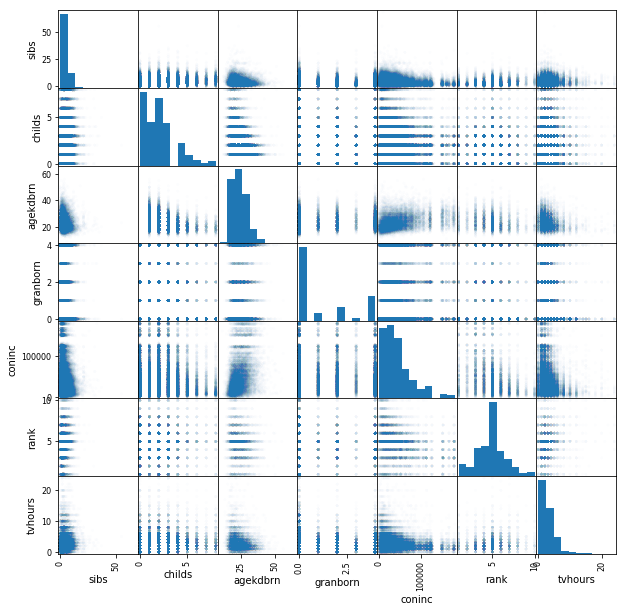

In [18]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data.iloc[:, 15:], alpha = .01, figsize = (10, 10))
pass

In [19]:
data.corr()

,Unnamed: 0,caseid,year,age,educ,paeduc,maeduc,speduc,sei,sibs,childs,agekdbrn,granborn,coninc,rank,tvhours
Unnamed: 0,1.000000,1.000000,0.998345,0.056285,0.203150,0.200960,0.203513,0.218546,0.048464,-0.073929,-0.056951,0.012363,-0.020027,0.096870,-0.058339,-0.001994
caseid,1.000000,1.000000,0.998345,0.056285,0.203150,0.200960,0.203513,0.218546,0.048464,-0.073929,-0.056951,0.012363,-0.020027,0.096870,-0.058339,-0.001994
year,0.998345,0.998345,1.000000,0.054923,0.207956,0.205139,0.205965,0.223620,0.057723,-0.075970,-0.060195,0.024351,-0.009342,0.101219,-0.061547,-0.002228
age,0.056285,0.056285,0.054923,1.000000,-0.204311,-0.312058,-0.324715,-0.170690,0.013023,0.126142,0.360464,0.097563,0.109490,-0.051520,-0.046362,0.094059
educ,0.203150,0.203150,0.207956,-0.204311,1.000000,0.490471,0.475221,0.632224,0.581850,-0.308237,-0.251144,0.340486,0.025626,0.397028,-0.231842,-0.228821
paeduc,0.200960,0.200960,0.205139,-0.312058,0.490471,1.000000,0.686664,0.447697,0.275152,-0.306335,-0.271118,0.184232,-0.080621,0.236245,-0.185808,-0.133396
maeduc,0.203513,0.203513,0.205965,-0.324715,0.475221,0.686664,1.000000,0.429771,0.244297,-0.303662,-0.255953,0.134210,-0.178196,0.222408,-0.166124,-0.125998
speduc,0.218546,0.218546,0.223620,-0.170690,0.632224,0.447697,0.429771,1.000000,0.415512,-0.266769,-0.208067,0.303857,0.007972,0.454761,-0.251044,-0.191604
sei,0.048464,0.048464,0.057723,0.013023,0.581850,0.275152,0.244297,0.415512,1.000000,-0.196735,-0.118507,0.292921,0.065634,0.397365,-0.201330,-0.220417
sibs,-0.073929,-0.073929,-0.075970,0.126142,-0.308237,-0.306335,-0.303662,-0.266769,-0.196735,1.000000,0.196186,-0.139089,0.008558,-0.177086,0.114103,0.072359


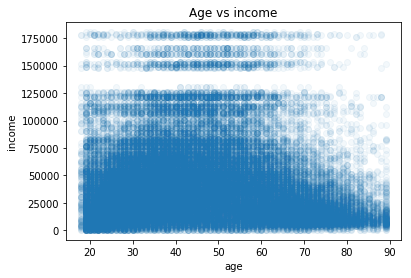

In [20]:
plt.plot(data['age'], data['coninc'], 'o', alpha = 0.05)
plt.xlabel('age')
plt.ylabel('income')
plt.title('Age vs income')
pass

In [21]:
data['coninc'].describe()

count     51232.000000
mean      44503.038316
std       35936.012301
min         383.000000
25%       18445.000000
50%       35602.000000
75%       59542.000000
max      180386.000000
Name: coninc, dtype: float64

In [22]:
def group_inc(row):
    if row['coninc'] >= 50000:
        return 1
    else:
        return 0

data['class'] = data.apply(group_inc, axis=1)

In [23]:
data['class'].describe()

count    57061.000000
mean         0.298540
std          0.457622
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: class, dtype: float64

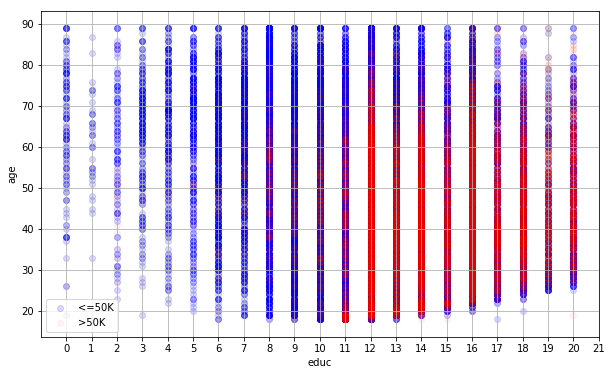

In [24]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['class'] == 0]['educ'],
            data[data['class'] == 0]['age'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.scatter(data[data['class'] == 1]['educ'],
            data[data['class'] == 1]['age'],
            alpha = 0.05,
            label = '>50K',
            color = 'r')

plt.xlabel('educ')
plt.xticks(range(22))
plt.xlim(-1, 21)
plt.ylabel('age')
plt.legend()
plt.grid()

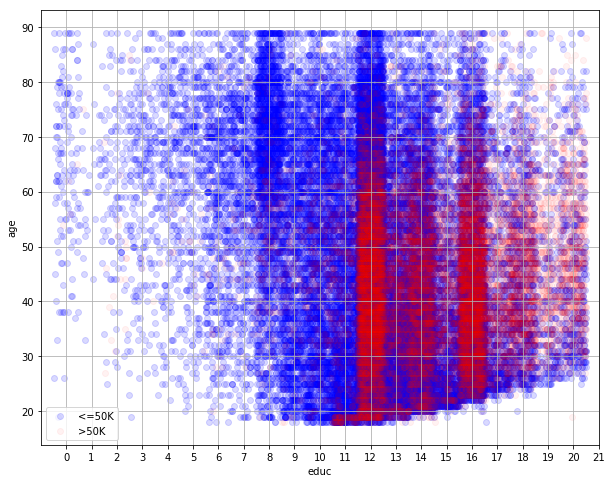

In [25]:
np.random.seed(0)
educ_rnd = data['educ'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(educ_rnd[data['class'] == 0],
            data[data['class'] == 0]['age'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.scatter(educ_rnd[data['class'] == 1],
            data[data['class'] == 1]['age'],
            alpha = 0.05,
            label = '>50K',
            color = 'r')

plt.xlabel('educ')
plt.xticks(range(22))
plt.xlim(-1, 21)
plt.ylabel('age')
plt.legend()
plt.grid()

In [26]:
data.describe(include = ['object'])

,sex,race,hispanic,uscitzn,degree,vetyears,wrkstat,wrkslf,marital,spwrksta,...,rifle,news,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
count,57061,57061,18920,770,56051,21884,57047,53549,57041,30697,...,34211,35689,24086,24421,24459,23827,20166,19072,19327,19884
unique,2,3,28,4,5,5,8,2,5,8,...,3,5,2,2,2,2,3,3,3,3
top,Female,White,Not Hispanic,Not A U.S. Citizen,High School,None,Working Fulltime,Someone Else,Married,Working Fulltime,...,No,Everyday,No,No,No,Yes,Agree With Both,Agree With Both,Agree With Both,No Special Treatment
freq,31915,46350,16936,378,29287,18093,28207,47352,30761,16815,...,25580,17023,14456,20987,12454,12765,12273,10874,8903,8656


In [27]:
data.describe(include = 'all')

,Unnamed: 0,caseid,year,age,sex,race,hispanic,uscitzn,educ,paeduc,...,news,tvhours,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
count,57061.000000,57061.000000,57061.000000,56859.000000,57061,57061,18920,770,56897.000000,40173.000000,...,35689,33855.000000,24086,24421,24459,23827,20166,19072,19327,19884
unique,NaN,NaN,NaN,NaN,2,3,28,4,NaN,NaN,...,5,NaN,2,2,2,2,3,3,3,3
top,NaN,NaN,NaN,NaN,Female,White,Not Hispanic,Not A U.S. Citizen,NaN,NaN,...,Everyday,NaN,No,No,No,Yes,Agree With Both,Agree With Both,Agree With Both,No Special Treatment
freq,NaN,NaN,NaN,NaN,31915,46350,16936,378,NaN,NaN,...,17023,NaN,14456,20987,12454,12765,12273,10874,8903,8656
mean,28531.000000,28531.000000,1992.084261,45.697955,NaN,NaN,NaN,NaN,12.753590,10.554004,...,NaN,2.970699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,16472.236192,16472.236192,11.724820,17.472112,NaN,NaN,NaN,NaN,3.181642,4.349151,...,NaN,2.353317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1972.000000,18.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,14266.000000,14266.000000,1983.000000,31.000000,NaN,NaN,NaN,NaN,12.000000,8.000000,...,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,28531.000000,28531.000000,1993.000000,43.000000,NaN,NaN,NaN,NaN,12.000000,12.000000,...,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,42796.000000,42796.000000,2002.000000,59.000000,NaN,NaN,NaN,NaN,15.000000,13.000000,...,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data['wrkstat'].unique()

array(['Working Fulltime', 'Retired', 'Working Parttime', 'Keeping House',
       'School', 'Unempl, Laid Off', 'Temp Not Working', 'Other', nan],
      dtype=object)

In [29]:
for name in data['degree'].unique():
    print(name, (data['educ'][data['degree'] == name]).mean())

Bachelor 16.33975
Lt High School 8.814093845630738
High School 12.610750410060142
nan nan
Graduate 18.378364389233955
Junior College 14.406066536203522


## Задача

С `coninc` задача кажется слишком простойа некоторие столбци кажутся неважными и даже вредными.

In [121]:
data = orig_data
data = data.drop(['caseid', 'year'], axis=1)
data = data.drop(['Unnamed: 0', 'hispanic', 'degree', 'uscitzn', 'sei', 'income06', 'vetyears', 'region', 'coninc'], axis=1)
data = data.drop(['natspac', 'natenvir', 'natheal', 'natcity', 'natcrime', 'natdrug', 'nateduc', 'natrace', 'natarms', 'nataid', 'natfare', 'natroad', 'natsoc', 'natmass', 'natpark'], axis=1)
data = data.drop(['confinan', 'conbus', 'conclerg', 'coneduc', 'confed', 'conlabor', 'conpress', 'conmedic', 'contv', 'conjudge', 'consci', 'conlegis', 'conarmy'], axis=1)
data = data.drop(['joblose', 'jobfind', 'satjob', 'richwork', 'jobinc', 'jobsec', 'jobhour', 'jobpromo', 'jobmeans', 'satfin', 'finalter'], axis=1)
data = data.drop(['finrela', 'unemp', 'govaid', 'getaid', 'union', 'getahead', 'parsol', 'kidssol'], axis=1)
data = data.drop(['abdefect', 'abnomore', 'abhlth', 'abpoor', 'abrape', 'absingle', 'abany',], axis=1)
data = data.drop(['pillok', 'sexeduc', 'divlaw', 'premarsx', 'teensex', 'xmarsex', 'homosex'], axis=1)
data = data.drop(['relig', 'attend'], axis=1)
data = data.drop(['suicide1', 'suicide2', 'suicide3', 'suicide4'], axis=1)
data = data.drop(['fear', 'owngun', 'pistol', 'shotgun', 'rifle'], axis=1)
#data = data.drop(['tvhours', 'news'], axis=1)
data = data.drop(['racdif1', 'racdif2', 'racdif3', 'racdif4'], axis=1)
data = data.drop(['helppoor', 'helpnot', 'helpsick', 'helpblk'], axis=1)


In [31]:
0

0

# Готовим данные

In [122]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['sex', 'race', 'wrkstat', 'wrkslf', 'marital', 'spwrksta', 'incom16', 'born', 'parborn', 'partyid', 'polviews', 'news']
['age', 'educ', 'paeduc', 'maeduc', 'speduc', 'sibs', 'childs', 'agekdbrn', 'granborn', 'class', 'rank', 'tvhours']


In [123]:
for c in categorical_columns:
    print(c, data[c].unique())

sex ['Female' 'Male']
race ['White' 'Black' 'Other']
wrkstat ['Working Fulltime' 'Retired' 'Working Parttime' 'Keeping House' 'School'
 'Unempl, Laid Off' 'Temp Not Working' 'Other' nan]
wrkslf ['Someone Else' nan 'Self-Employed']
marital ['Never Married' 'Married' 'Divorced' 'Widowed' 'Separated' nan]
spwrksta [nan 'Keeping House' 'Working Fulltime' 'Temp Not Working'
 'Working Parttime' 'Retired' 'Unempl, Laid Off' 'School' 'Other']
incom16 ['Average' 'Above Average' 'Below Average' 'Far Below Average' nan
 'Far Above Average' 'Lived In Institution']
born [nan 'Yes' 'No']
parborn [nan 'Neither In U.S' 'Both In U.S' 'Mother Only' 'Father Only'
 'Dk For Both' 'Mother; Fa. Dk' 'Not Mother;Fa.Dk' 'Not Father;Mo.Dk'
 'Father; Mo.Dk']
partyid ['Ind,Near Dem' 'Not Str Democrat' 'Independent' 'Strong Democrat'
 'Not Str Republican' 'Ind,Near Rep' 'Strong Republican' 'Other Party' nan]
polviews [nan 'Moderate' 'Slightly Conservative' 'Conservative' 'Liberal'
 'Extrmly Conservative' 'Slightly 

## Обрабатываем пропущенные значения

Если данные содержат пропущенные значения, то имеется две простые альтернативы:
- удалить столбцы с такими значениями (`data = data.dropna(axis = 1)`),
- удалить строки с такими значениями (`data = data.dropna(axis = 0)`).

После этого данных может стать совсем мало.

Куда более эффективным (и в то же время по-прежнему простым) методом обычно является заполнение пропущенных значений для каждой количественной переменной их средним или медианным значением. 
Для категориальных признаков пропущенные значения можно заполнить самым популярным значением в столбце.

In [124]:
data.median(axis = 0)

age         43.0
educ        12.0
paeduc      12.0
maeduc      12.0
speduc      12.0
sibs         3.0
childs       2.0
agekdbrn    23.0
granborn     0.0
class        0.0
rank         5.0
tvhours      2.0
dtype: float64

In [125]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [126]:
data[numerical_columns].count(axis = 0)

age         57061
educ        57061
paeduc      57061
maeduc      57061
speduc      57061
sibs        57061
childs      57061
agekdbrn    57061
granborn    57061
class       57061
rank        57061
tvhours     57061
dtype: int64

In [127]:
data[categorical_columns].count(axis = 0)

sex         57061
race        57061
wrkstat     57047
wrkslf      53549
marital     57041
spwrksta    30697
incom16     43739
born        47804
parborn     47766
partyid     56734
polviews    47876
news        35689
dtype: int64

In [128]:
data['wrkstat'].describe()

count                57047
unique                   8
top       Working Fulltime
freq                 28207
Name: wrkstat, dtype: object

In [129]:
type(data['wrkstat'].describe())

pandas.core.series.Series

In [130]:
data['wrkstat'].describe().top

'Working Fulltime'

In [41]:
#data['wrkstat'] = data['wrkstat'].fillna(data['wrkstat'].describe().top)

In [131]:
data.describe(include = [object])

,sex,race,wrkstat,wrkslf,marital,spwrksta,incom16,born,parborn,partyid,polviews,news
count,57061,57061,57047,53549,57041,30697,43739,47804,47766,56734,47876,35689
unique,2,3,8,2,5,8,6,2,9,8,7,5
top,Female,White,Working Fulltime,Someone Else,Married,Working Fulltime,Average,Yes,Both In U.S,Not Str Democrat,Moderate,Everyday
freq,31915,46350,28207,47352,30761,16815,21941,43705,39137,12040,18494,17023


In [132]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [133]:
data.describe(include = [object])

,sex,race,wrkstat,wrkslf,marital,spwrksta,incom16,born,parborn,partyid,polviews,news
count,57061,57061,57061,57061,57061,57061,57061,57061,57061,57061,57061,57061
unique,2,3,8,2,5,8,6,2,9,8,7,5
top,Female,White,Working Fulltime,Someone Else,Married,Working Fulltime,Average,Yes,Both In U.S,Not Str Democrat,Moderate,Everyday
freq,31915,46350,28221,50864,30781,43179,35263,52962,48432,12367,27679,38395


## Векторизация

Нужно что-то сделать с категориальными (номинальными) признаками

In [134]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['sex', 'wrkslf', 'born'] ['race', 'wrkstat', 'marital', 'spwrksta', 'incom16', 'parborn', 'partyid', 'polviews', 'news']


In [135]:
data['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [47]:
#data.at[data['sex'] == 'Male', 'sex'] = 0
#data.at[data['sex'] == 'Female', 'sex'] = 1
#data['sex'].describe()

In [136]:
for name in binary_columns:
    unq = data[name].unique()
    print(unq)
    data.at[data[name] == unq[0], name] = 0
    data.at[data[name] == unq[1], name] = 1

data['sex'].describe()

['Female' 'Male']
['Someone Else' 'Self-Employed']
['Yes' 'No']


count    57061.000000
mean         0.440686
std          0.496474
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: sex, dtype: float64

### К небинарными признакам применим метод _векторизации_, 
который заключается в следующем.

Признак `j`, принимающий `s` значений, заменим на `s` признаков, принимащих значения `0` или `1`,
в зависимости от того, чему равно значение исходного признака `j`.

Например, в нашей задаче признак `race` принимает 3 различных значений: 

In [137]:
data['race'].unique()

array(['White', 'Black', 'Other'], dtype=object)

Заменим признак `race` 3 признаками: `race_White`, `race_Black`, `race_Other`.

 - Если признак `race` принимает значение `White`, то признак `race_White` равен `1`, а все остальные равны `0`.
 - Если признак `race` принимает значение `Black`, то признак `race_Black` равен `1`, а все остальные равны `0`.
 - и т.д.

Такую векторизацию осуществляет в pandas метод `get_dummies`:

In [139]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['race_Black', 'race_Other', 'race_White', 'wrkstat_Keeping House',
       'wrkstat_Other', 'wrkstat_Retired', 'wrkstat_School',
       'wrkstat_Temp Not Working', 'wrkstat_Unempl, Laid Off',
       'wrkstat_Working Fulltime', 'wrkstat_Working Parttime',
       'marital_Divorced', 'marital_Married', 'marital_Never Married',
       'marital_Separated', 'marital_Widowed', 'spwrksta_Keeping House',
       'spwrksta_Other', 'spwrksta_Retired', 'spwrksta_School',
       'spwrksta_Temp Not Working', 'spwrksta_Unempl, Laid Off',
       'spwrksta_Working Fulltime', 'spwrksta_Working Parttime',
       'incom16_Above Average', 'incom16_Average', 'incom16_Below Average',
       'incom16_Far Above Average', 'incom16_Far Below Average',
       'incom16_Lived In Institution', 'parborn_Both In U.S',
       'parborn_Dk For Both', 'parborn_Father Only', 'parborn_Father; Mo.Dk',
       'parborn_Mother Only', 'parborn_Mother; Fa. Dk',
       'parborn_Neither In U.S', 'parborn_Not Father;Mo.Dk',
   

## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [140]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,educ,paeduc,maeduc,speduc,sibs,childs,agekdbrn,granborn,class,rank,tvhours
count,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000
mean,45.688404,12.751424,10.981967,10.942220,12.405145,3.912392,1.952998,23.249943,0.910429,0.298540,4.960744,2.575928
std,17.441894,3.177322,3.708438,3.431464,2.287893,3.147643,1.788697,3.082825,1.500760,0.457622,0.775909,1.874340
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,1.000000,0.000000
25%,31.000000,12.000000,8.000000,9.000000,12.000000,2.000000,0.000000,23.000000,0.000000,0.000000,5.000000,2.000000
50%,43.000000,12.000000,12.000000,12.000000,12.000000,3.000000,2.000000,23.000000,0.000000,0.000000,5.000000,2.000000
75%,59.000000,15.000000,12.000000,12.000000,12.000000,5.000000,3.000000,23.000000,2.000000,1.000000,5.000000,3.000000
max,89.000000,20.000000,20.000000,20.000000,20.000000,68.000000,8.000000,65.000000,4.000000,1.000000,10.000000,24.000000


In [141]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [142]:
data_numerical.describe()

,age,educ,paeduc,maeduc,speduc,sibs,childs,agekdbrn,granborn,class,rank,tvhours
count,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04
mean,-1.390973e-15,-1.145490e-14,3.390206e-14,-9.592714e-14,-7.173102e-14,5.667253e-16,6.362887e-15,8.212894e-15,-4.266087e-14,1.107614e-14,-1.476717e-14,5.309354e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.587465e+00,-4.013261e+00,-2.961345e+00,-3.188790e+00,-5.422084e+00,-1.242959e+00,-1.091855e+00,-4.622366e+00,-6.066453e-01,-6.523733e-01,-5.104653e+00,-1.374312e+00
25%,-8.421335e-01,-2.364960e-01,-8.041031e-01,-5.660032e-01,-1.770823e-01,-6.075631e-01,-1.091855e+00,-8.107598e-02,-6.066453e-01,-6.523733e-01,5.059389e-02,-3.072696e-01
50%,-1.541348e-01,-2.364960e-01,2.745181e-01,3.082591e-01,-1.770823e-01,-2.898651e-01,2.627741e-02,-8.107598e-02,-6.066453e-01,-6.523733e-01,5.059389e-02,-3.072696e-01
75%,7.631967e-01,7.076953e-01,2.745181e-01,3.082591e-01,-1.770823e-01,3.455309e-01,5.853435e-01,-8.107598e-02,7.260125e-01,1.532838e+00,5.059389e-02,2.262517e-01
max,2.483193e+00,2.281347e+00,2.431760e+00,2.639625e+00,3.319585e+00,2.036050e+01,3.380674e+00,1.354279e+01,2.058670e+00,1.532838e+00,6.494652e+00,1.143020e+01


## Соединяем все в одну таблицу

In [143]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
#print data.columns

(57061, 74)


In [144]:
data.describe()

,age,educ,paeduc,maeduc,speduc,sibs,childs,agekdbrn,granborn,class,...,polviews_Slightly Conservative,polviews_Slightly Liberal,news_Everyday,news_Few Times A Week,news_Less Than Once Wk,news_Never,news_Once A Week,sex,wrkslf,born
count,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,...,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000
mean,-1.390973e-15,-1.145490e-14,3.390206e-14,-9.592714e-14,-7.173102e-14,5.667253e-16,6.362887e-15,8.212894e-15,-4.266087e-14,1.107614e-14,...,0.134786,0.108323,0.672876,0.134137,0.063231,0.049158,0.080598,0.440686,0.108603,0.071835
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.341497,0.310790,0.469167,0.340803,0.243379,0.216200,0.272219,0.496474,0.311143,0.258217
min,-1.587465e+00,-4.013261e+00,-2.961345e+00,-3.188790e+00,-5.422084e+00,-1.242959e+00,-1.091855e+00,-4.622366e+00,-6.066453e-01,-6.523733e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.421335e-01,-2.364960e-01,-8.041031e-01,-5.660032e-01,-1.770823e-01,-6.075631e-01,-1.091855e+00,-8.107598e-02,-6.066453e-01,-6.523733e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.541348e-01,-2.364960e-01,2.745181e-01,3.082591e-01,-1.770823e-01,-2.898651e-01,2.627741e-02,-8.107598e-02,-6.066453e-01,-6.523733e-01,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.631967e-01,7.076953e-01,2.745181e-01,3.082591e-01,-1.770823e-01,3.455309e-01,5.853435e-01,-8.107598e-02,7.260125e-01,1.532838e+00,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2.483193e+00,2.281347e+00,2.431760e+00,2.639625e+00,3.319585e+00,2.036050e+01,3.380674e+00,1.354279e+01,2.058670e+00,1.532838e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X и y

In [149]:
X = data.drop(('class'), axis = 1) # выбрасываем столбец 'class'
y = data['class'].astype(int)
feature_names = X.columns


In [102]:
type(feature_names)

pandas.core.indexes.base.Index

In [150]:
feature_names

Index(['age', 'educ', 'paeduc', 'maeduc', 'speduc', 'sibs', 'childs',
       'agekdbrn', 'granborn', 'rank', 'tvhours', 'race_Black', 'race_Other',
       'race_White', 'wrkstat_Keeping House', 'wrkstat_Other',
       'wrkstat_Retired', 'wrkstat_School', 'wrkstat_Temp Not Working',
       'wrkstat_Unempl, Laid Off', 'wrkstat_Working Fulltime',
       'wrkstat_Working Parttime', 'marital_Divorced', 'marital_Married',
       'marital_Never Married', 'marital_Separated', 'marital_Widowed',
       'spwrksta_Keeping House', 'spwrksta_Other', 'spwrksta_Retired',
       'spwrksta_School', 'spwrksta_Temp Not Working',
       'spwrksta_Unempl, Laid Off', 'spwrksta_Working Fulltime',
       'spwrksta_Working Parttime', 'incom16_Above Average', 'incom16_Average',
       'incom16_Below Average', 'incom16_Far Above Average',
       'incom16_Far Below Average', 'incom16_Lived In Institution',
       'parborn_Both In U.S', 'parborn_Dk For Both', 'parborn_Father Only',
       'parborn_Father; Mo.Dk', 

In [151]:
print(X.shape)
print(y.shape)
N, d = X.shape

(57061, 73)
(57061,)


In [152]:
type(X)

pandas.core.frame.DataFrame

In [153]:
type(y)

pandas.core.series.Series

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

39942 17119


In [155]:
N_train + N_test

57061

In [64]:
#data_drop = data.drop('capital-gain',   axis = 1)\
#                .drop('capital-loss',   axis = 1)\
#                .drop('education',      axis = 1)\
#                .drop('fnlwgt',         axis = 1)\
#                .drop('workclass',      axis = 1)\
#                .drop('race',           axis = 1)\
#                .drop('sex',            axis = 1)\
#                .drop('native-country', axis = 1)\
#                .drop('class',          axis = 1)    

В библиотеке scikit-learn реализована масса алгоритмов машинного обучения.

#### Некоторые алгоритмы машинного обучения, реализованные в scikit-learn:

 Метод                                     |  Класс
-------------------------------------------|--------------------------------------------         
 kNN – $k$ ближайших соседей               | `sklearn.neighbors.KNeighborsClassifier`
 LDA – линейный дискриминантный анализ     | `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`
 QDA – квадратичный дискриминантный анализ | `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis`
 Logistic – логистическая регрессия        | `sklearn.linear_model.LogisticRegression`
 SVC – машина опорных векторов             | `sklearn.svm.SVC`
 Tree – деревья решений                    | `sklearn.tree.DecisionTreeClassifier`
 RF – случайный лес                        | `sklearn.ensemble.RandomForestClassifier`
 ExtrRF – экстремально случайный лес       | ` `
 AdaBoost – алгоритм AdaBoost              | `sklearn.ensemble.AdaBoostClassifier`
 GBT – градиентный бустинг деревьев решений| `sklearn.ensemble.GradientBoostingClassifier`
 Нейронные сети                            | ` `
 



#### Основные методы классов, реализующих алгоритмы машинного обучения
Все алгоритмы выполнены в виде классов, обладающих по крайней мере следующими методами:



   Метод класса            |  Описание     
 --------------------------|-------------------------------------------------------------
  `fit(X_train, y_train)`              |  обучение (тренировка) модели на обучающей выборке `X_train`, `y_train`
  `predict(X)`             |  предсказание на данных `X`
  `set_params(**params)`   |  установка параметров алгоритма
  `get_params()`           |  чтение параметров алгоритма
 
 Заметим, что параметры алгоритмов обучения можно задавать как в конструкторе класса, так и с помощью метода `set_params(**params)`.
 
 #### Таблица наличия/отсутствия методов для основных алгоритмов машинного обучения:
 
    
   Методы класса               | kNN | LDA | QDA | Logistic | SVC | Tree | RF | AdaBoost | GBT     
 ------------------------------|-----|-----|-----|----------|-----|------|----|----------|------
  `fit(X, y)`                  |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict(X)`                 |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict_proba(X)`           |  +  |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `predict_log_proba(X)`       |     |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `score(X, y)`                |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `decision_function(X)`       |     |  +  |  +  |    +     |  +  |      |    |    +     |  +
  `transform(X)`               |     |  +  |     |    +     |     |  +   | +  |          |  +
  `staged_decision_function(X)`|     |     |     |          |     |      |    |    +     |  +    
  `staged_predict(X)`          |     |     |     |          |     |      |    |    +     |  +
  `staged_predict_proba(X)`    |     |     |     |          |     |      |    |    +     |  +
  `staged_score(X, y)`         |     |     |     |          |     |      |    |    +     |  +
  `set_params(**params)`       |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `get_params()`               |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
    
    

# $k$NN

In [156]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [157]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [158]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.19806219017575485 0.2366960686956014


In [112]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [159]:
err_test

0.2366960686956014

In [160]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[10774  1256]
 [ 2796  2293]]


In [161]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]])

### Подбор параметров

In [ ]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

# SVC

In [167]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.21295879024585648 0.2178865587943221


### Подбор параметров

In [ ]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

In [ ]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

# Random Forest

In [162]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.2150242420702144


### Значимость признаков

In [163]:
a=[1,2,5,70,32,3,4,7,234, 3]
a[-1:3:-1]

[3, 234, 7, 4, 3, 32]

In [119]:
np.sum(rf.feature_importances_)

1.0000000000000002

In [164]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature '  age' (0.103096)
 2. feature ' educ' (0.086323)
 3. feature 'speduc' (0.081499)
 4. feature ' sibs' (0.054617)
 5. feature 'paeduc' (0.050939)
 6. feature 'maeduc' (0.047601)
 7. feature 'childs' (0.038429)
 8. feature 'marital_Married' (0.037950)
 9. feature 'tvhours' (0.037526)
10. feature 'agekdbrn' (0.036992)
11. feature 'wrkstat_Working Fulltime' (0.024309)
12. feature 'granborn' (0.022787)
13. feature ' rank' (0.018650)
14. feature '  sex' (0.015402)
15. feature 'polviews_Moderate' (0.014453)
16. feature 'incom16_Average' (0.013150)
17. feature 'spwrksta_Working Fulltime' (0.012472)
18. feature 'news_Everyday' (0.012122)
19. feature 'partyid_Not Str Democrat' (0.012098)
20. feature 'partyid_Not Str Republican' (0.011438)
21. feature 'wrkslf' (0.010777)
22. feature 'polviews_Slightly Conservative' (0.010444)
23. feature 'incom16_Below Average' (0.010198)
24. feature 'partyid_Independent' (0.010034)
25. feature 'incom16_Above Average' (0.009850)
26. f

In [165]:
feature_names[[1,0,1]]

Index(['educ', 'age', 'educ'], dtype='object')

(-1, 20)

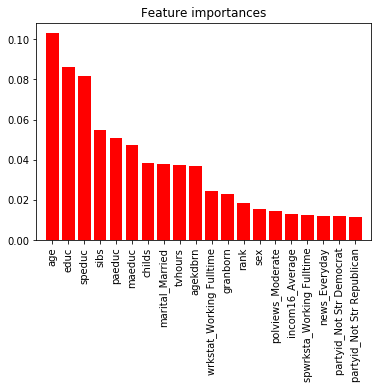

In [166]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

# Extremely Randomized Trees

In [168]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.22390326537765057


# AdaBoost

In [169]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.21015472435030794 0.21759448565920905


# GBT

In [170]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.18654549096189474 0.21309655937846836
